In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

In [5]:
url = 'https://raw.githubusercontent.com/selva86/' + \
'datasets/master/orange_juice_withmissing.csv'

In [7]:
df_raw = pd.read_csv(url)
df_raw

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1.0
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1.0
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0.0
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [20]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ','_')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1
    )
    .rename(columns={'purchase':'target'})
    .astype({'target': 'category',
    'specialmm':'category',
    'specialch':'category',
    'storeid':'category',
    'store7':'category'})
    .drop('store',axis=1)
)

In [21]:
df_interim

,target,weekofpurchase,storeid,pricech,pricemm,discch,discmm,specialch,specialmm,loyalch,salepricemm,salepricech,pricediff,store7,pctdiscmm,pctdiscch,listpricediff
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27


In [22]:
df = df_interim.copy()

In [23]:
# EDA

df_train, df_test = train_test_split(df, random_state= 2024, test_size= 0.2)
df_train = df_train.reset_index(drop=True).sort_values(by= 'target')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 856 entries, 427 to 0
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   target          856 non-null    category
 1   weekofpurchase  856 non-null    int64   
 2   storeid         855 non-null    category
 3   pricech         855 non-null    float64 
 4   pricemm         854 non-null    float64 
 5   discch          854 non-null    float64 
 6   discmm          852 non-null    float64 
 7   specialch       854 non-null    category
 8   specialmm       852 non-null    category
 9   loyalch         852 non-null    float64 
 10  salepricemm     851 non-null    float64 
 11  salepricech     856 non-null    float64 
 12  pricediff       855 non-null    float64 
 13  store7          856 non-null    category
 14  pctdiscmm       851 non-null    float64 
 15  pctdiscch       854 non-null    float64 
 16  listpricediff   856 non-null    float64 
dtypes: category(5), float

In [25]:

display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
weekofpurchase,856.0,253.926402,15.533565,227.000000,240.00,256.000000,268.000000,278.000000
pricech,855.0,1.866772,0.101478,1.690000,1.79,1.860000,1.990000,2.090000
pricemm,854.0,2.083232,0.135718,1.690000,1.99,2.090000,2.180000,2.290000
discch,854.0,0.051159,0.116936,0.000000,0.00,0.000000,0.000000,0.500000
discmm,852.0,0.120329,0.211033,0.000000,0.00,0.000000,0.200000,0.800000
loyalch,852.0,0.558151,0.307783,0.000011,0.32,0.585874,0.843800,0.999947
salepricemm,851.0,1.963173,0.251034,1.190000,1.69,2.090000,2.130000,2.290000
salepricech,856.0,1.815724,0.142852,1.390000,1.75,1.860000,1.890000,2.090000
pricediff,855.0,0.147380,0.269332,-0.670000,0.00,0.230000,0.320000,0.640000
pctdiscmm,851.0,0.058011,0.100481,0.000000,0.00,0.000000,0.112676,0.402010


,count,unique,top,freq
target,856,2,CH,522
storeid,855.0,5.0,7.0,288.0
specialch,854.0,2.0,0.0,731.0
specialmm,852.0,2.0,0.0,716.0
store7,856,2,No,567


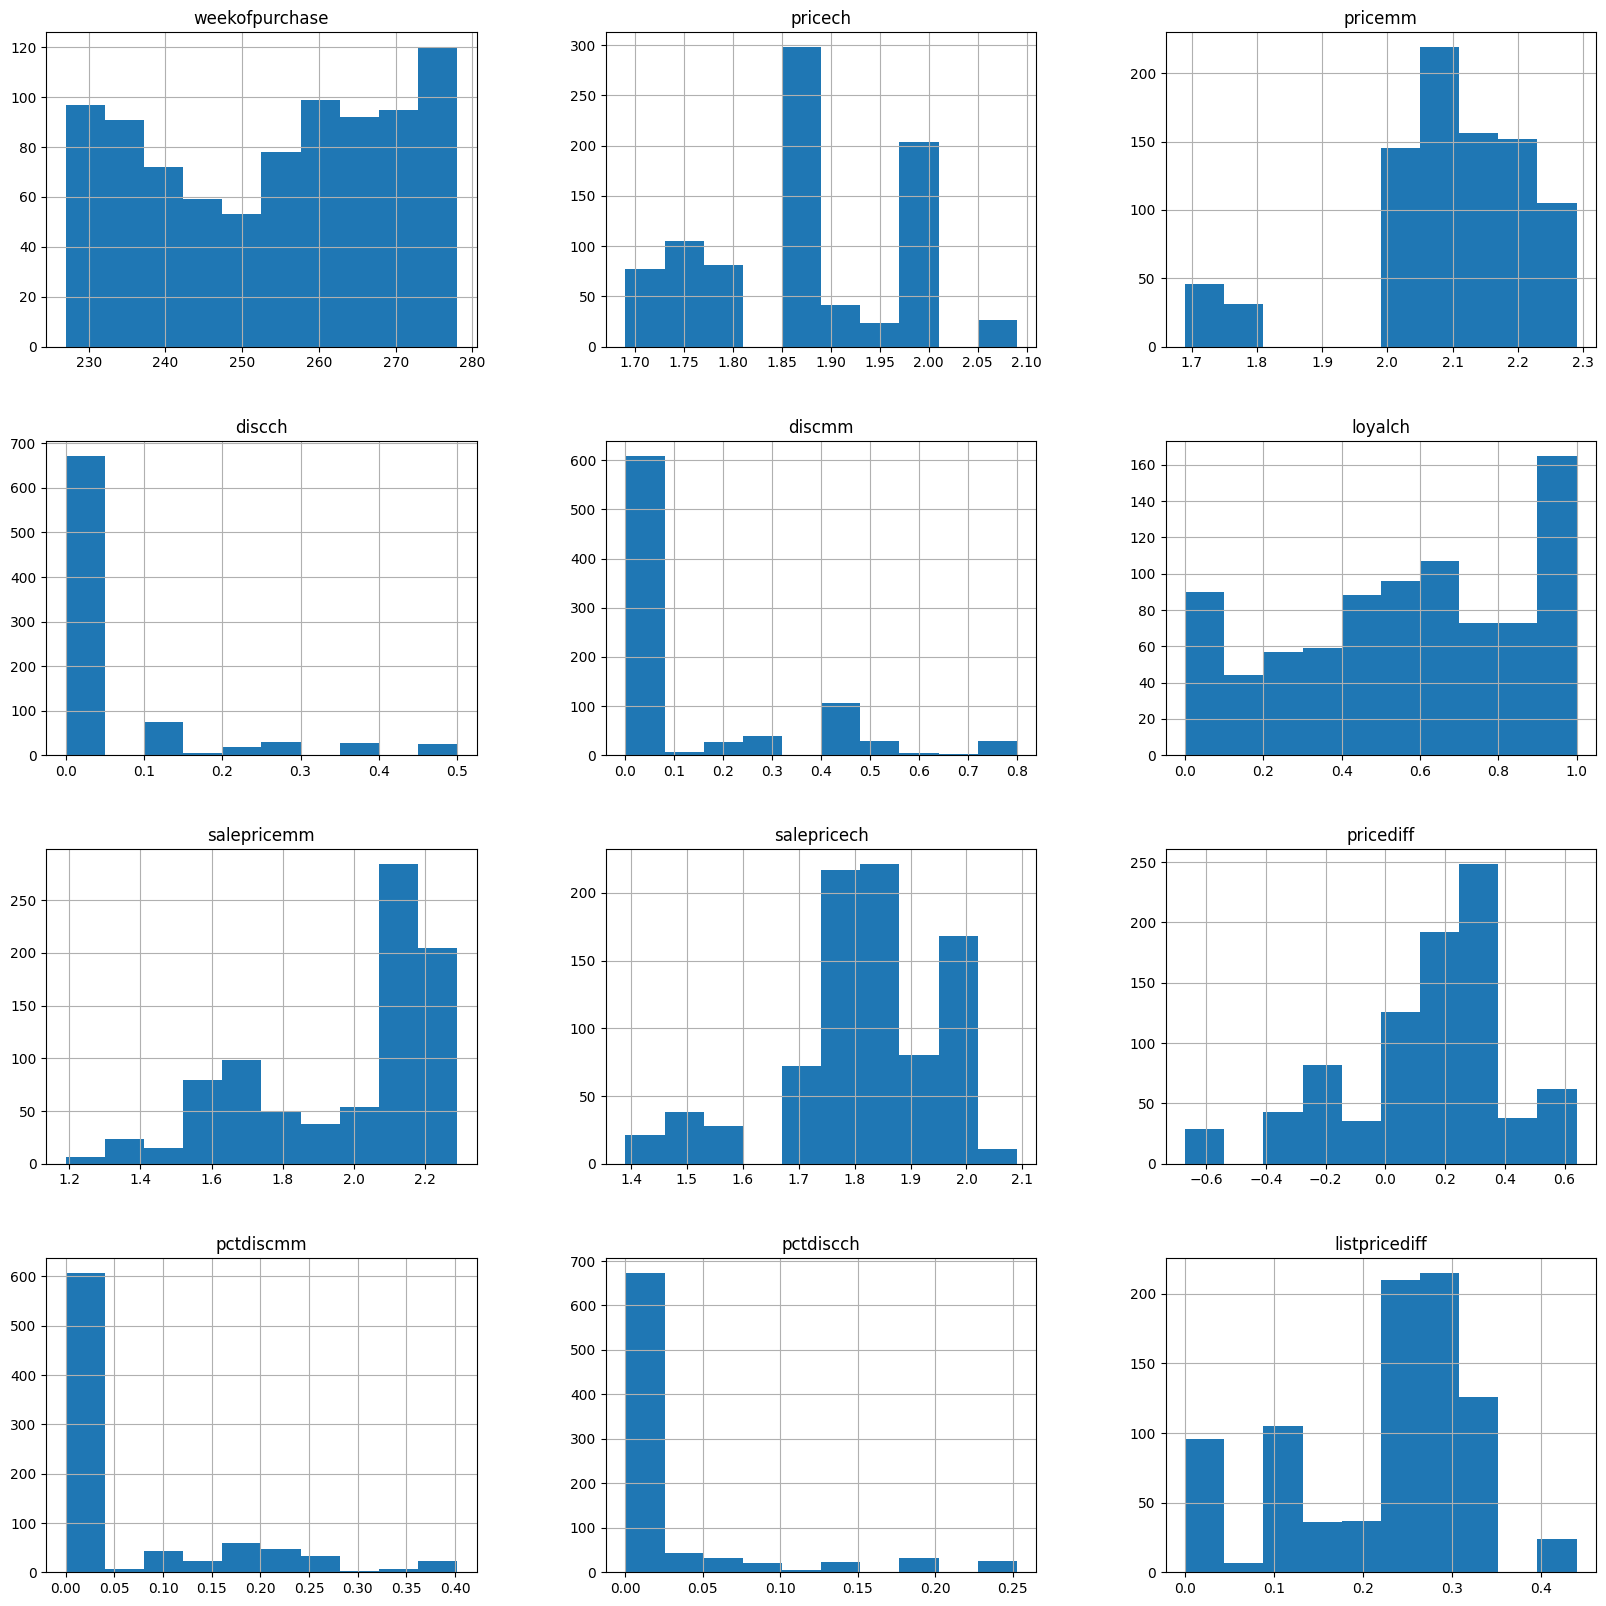

In [26]:
df_train.hist(figsize=(20, 20))
plt.show()